# Start exploring dataset in loan.csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wrn
wrn.filterwarnings('ignore')

import plotly as py
import plotly.express as px
import cufflinks as cf

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline()

#Anaconda Prompt - use this command to search command prompt on windows to run below command
#conda install -c conda-forge cufflinks-py
# or use pip install plotly pip install cufflinks
#

In [2]:
#Referrences
#https://www.youtube.com/watch?v=GGL6U0k8WYA
#https://www.youtube.com/watch?v=4DnWYK88-E4
#https://www.youtube.com/watch?v=Bjz00ygERxY
#https://medium.com/@ozan/interactive-plots-with-plotly-and-cufflinks-on-pandas-dataframes-af6f86f62d94
#https://pythonguides.com/what-is-matplotlib-inline/
#https://towardsdatascience.com/financial-data-analysis-2f86b1341e6e
#https://towardsdatascience.com/financial-data-analysis-80ba39149126

In [3]:
loan_df = pd.read_csv('loan.csv')

In [4]:
#When executed for the first time warning message throwed like column:47 has mixed data type. 
#So i have imported warnings package to ignore warnings

# Data analysis
# ----------------------


## First analyze columns or variables and short list what are all the variables important for anaysis

In [5]:
#Below are the datasets which are very important for analysis
#Variables: emp_length, pub_rec_bankruptcies, Loan_amount, term, interest_rate, grade, sub_grade,annual_income,
#purpose_of_loan,dti,issue_d,home_ownership,verificatoin_status,funded_amnt,funded_amnt_inv,pub_rec,
#loan_status,revol_util,addr_state

#We can ignore other variables because most of them related to customer behavior variables

## Ref: https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/

In [6]:
#Loan_status variable contains "Charged Off, Current, and Fully Paid" records and following analysis is analysing this data 
#Against most of other variables

In [7]:
#Based on analysis, finally i can conclude recommendations who from charged off persons can get loans or not get loans
# Also i can conclude who from fully paid should get loans or not get loans

# Data cleaning
# --------------------

## When loading loan data, i can see warning message as column number 47 (i,e pandas count from 0 so actual column number is 48) has mixed dtype values.
## Lets Analyze data in Column 48

In [8]:
loan_df.columns[47]

'next_pymnt_d'

In [9]:
len(loan_df.columns)

111

In [10]:
loan_df.next_pymnt_d.unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [11]:
loan_df.next_pymnt_d.size

39717

In [12]:
loan_df.next_pymnt_d.isnull().sum()

38577

In [13]:
#loan_df.next_pymnt_d column contains majority null values. So delete this column

In [14]:
del(loan_df['next_pymnt_d'])

In [15]:
#After deleting next_pamnt_d column, available columns are

In [16]:
len(loan_df.columns) 

110

# I am going to delete all columns which are not required or having more number of empty values. Before executing lets analyze all short listed variables which has more null values and fill with standby values for analysis

In [17]:
#Employment: Check the data in variable:emp_length and replace with standby values
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [18]:
loan_df.emp_length.isna().sum()

1075

In [19]:
loan_df.emp_length.fillna('0 years',inplace=True)

In [20]:
loan_df.emp_length.isna().sum()

0

In [21]:
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
0 years      1075
Name: emp_length, dtype: int64

In [22]:
#extract numberic values from emp_legnth dataset
loan_df['emp_length']=loan_df.emp_length.astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [23]:
loan_df.emp_length.dtype

dtype('int32')

In [24]:
loan_df.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [25]:
#Employment: Check the data in variable:pub_rec_bankruptcies and replace with standby values

In [26]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
loan_df['pub_rec_bankruptcies'].isna().sum()

697

In [28]:
#As this is about court cases. So fill data as unknown instead of null values
loan_df.pub_rec_bankruptcies.fillna('unknown',inplace=True)

In [29]:
loan_df['pub_rec_bankruptcies'].isna().sum()

0

In [30]:
loan_df['pub_rec_bankruptcies'].dtype

dtype('O')

In [31]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0        37339
1.0         1674
unknown      697
2.0            7
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
#Employment: Check the data in variable:loan_amnt and replace with standby values

In [33]:
loan_df.loan_amnt.value_counts()

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64

In [34]:
loan_df.loan_amnt.isna().sum()

0

In [35]:
#Employment: Check the data in variable:term and replace with standby values

In [36]:
loan_df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [37]:
loan_df.term.isna().sum()

0

In [38]:
#Employment: Check the data in variable:int_rate and replace with standby values

In [39]:
loan_df.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [40]:
loan_df.int_rate.isna().sum()

0

In [41]:
#Employment: Check the data in variable:grade and replace with standby values

In [42]:
loan_df.grade.isna().sum()

0

In [43]:
#Employment: Check the data in variable:sub_grade and replace with standby values

In [44]:
loan_df.sub_grade.isna().sum()

0

In [45]:
#Employment: Check the data in variable:annual_inc and replace with standby values

In [46]:
loan_df.annual_inc.isna().sum()

0

In [47]:
#Employment: Check the data in variable:purpose and replace with standby values

In [48]:
loan_df.purpose.isna().sum()

0

In [49]:
#Employment: Check the data in variable:dti and replace with standby values

In [50]:
loan_df.dti.isna().sum()

0

In [51]:
#Employment: Check the data in variable:issue_d and replace with standby values

In [52]:
loan_df.issue_d.isna().sum()

0

In [53]:
#Employment: Check the data in variable:home_ownership and replace with standby values

In [54]:
loan_df.home_ownership.isna().sum()

0

In [55]:
#Employment: Check the data in variable:verification_status and replace with standby values

In [56]:
loan_df.verification_status.isna().sum()

0

In [57]:
#Employment: Check the data in variable:funded_amnt and replace with standby values

In [58]:
loan_df.funded_amnt.isna().sum()

0

In [59]:
#Employment: Check the data in variable:funded_amnt_inv and replace with standby values

In [60]:
loan_df.funded_amnt_inv.isna().sum()

0

In [61]:
#Employment: Check the data in variable:loan_status and replace with standby values

In [62]:
loan_df.loan_status.isna().sum()

0

In [63]:
#Employment: check the variable dti ration

In [64]:
loan_df.dti.isna().sum()

0

In [65]:
#Check variable: pub_rec

In [66]:
loan_df.pub_rec.isna().sum()

0

In [67]:
#look data application_type and based on this i can conclude whether to look variables data related to annual_inc_joint,
#dti_joint, verified_status_joint

In [68]:
loan_df.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [69]:
loan_df[~(loan_df.application_type == 'INDIVIDUAL')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [70]:
loan_df.application_type.isna().sum()

0

In [71]:
#All application types are individual so we can ignore all joint variables

In [72]:
#Check null values in variable addr_state

In [73]:
loan_df.addr_state.isnull().sum()

0

In [74]:
#Check nullvalues in revol_util

In [75]:
loan_df.revol_util.isnull().sum()

50

In [76]:
loan_df.revol_util.fillna('0%',inplace=True)

In [77]:
loan_df.revol_util.isnull().sum()

0

# Delete all columns which has null values greater than 100 records. Having null values means, not so important for analysis

In [78]:
for i in loan_df.columns:
    if (loan_df[i].isnull().sum() > 100):
        del(loan_df[i])

# After deleting columns having null values in more than 100 records, below is the column count

In [79]:
len(loan_df.columns)

52

# To get importance of the columns, further evaluate column's having null values 

In [80]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc 

In [81]:
#As per above data, we can confirm, of the variables having null values are not so important. i will execlude all unimportant 
# variables later

# Analysing data in column: title

In [82]:
loan_df.title.size

39717

In [83]:
loan_df.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

# Not sure but we may need variable title because people who are charged off and are in good profession can still pay loans
# Replace all null data with text as "No Title"

In [84]:
loan_df["title"].isnull().sum()

11

In [85]:
loan_df["title"].fillna("No Title", inplace = True)

In [86]:
loan_df.title.isnull().sum()

0

In [87]:
#Check variable 'id' data. In case no duplicates then in dataframe contains applicats aviled only one loan. And this variable can be deleted

In [88]:
loan_df[loan_df.duplicated('id')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [89]:
# no duplicate data in column 'member_id'

In [90]:
loan_df[loan_df.duplicated('member_id')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


# Clean variable int_rate by removing unwated special characters or strings

In [91]:
loan_df['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [92]:
loan_df.int_rate=loan_df['int_rate'].apply(lambda x:x[0:-1])

In [93]:
# As per above analysis, Lets create a dataframe having only important variables for analysis

In [94]:
imp_columns = ['int_rate', 'title', 'loan_status', 'funded_amnt_inv', 'funded_amnt',
       'verification_status', 'home_ownership', 'issue_d', 'dti', 'purpose',
       'annual_inc', 'sub_grade', 'grade', 'term', 'loan_amnt',
       'pub_rec_bankruptcies', 'emp_length','pub_rec','addr_state','revol_util']
loan_df=loan_df[imp_columns]

In [95]:
loan_df.columns

Index(['int_rate', 'title', 'loan_status', 'funded_amnt_inv', 'funded_amnt',
       'verification_status', 'home_ownership', 'issue_d', 'dti', 'purpose',
       'annual_inc', 'sub_grade', 'grade', 'term', 'loan_amnt',
       'pub_rec_bankruptcies', 'emp_length', 'pub_rec', 'addr_state',
       'revol_util'],
      dtype='object')

In [96]:
loan_df.head()

,int_rate,title,loan_status,funded_amnt_inv,funded_amnt,verification_status,home_ownership,issue_d,dti,purpose,annual_inc,sub_grade,grade,term,loan_amnt,pub_rec_bankruptcies,emp_length,pub_rec,addr_state,revol_util
0,10.65,Computer,Fully Paid,4975.0,5000,Verified,RENT,Dec-11,27.65,credit_card,24000.0,B2,B,36 months,5000,0.0,10,0,AZ,83.70%
1,15.27,bike,Charged Off,2500.0,2500,Source Verified,RENT,Dec-11,1.00,car,30000.0,C4,C,60 months,2500,0.0,1,0,GA,9.40%
2,15.96,real estate business,Fully Paid,2400.0,2400,Not Verified,RENT,Dec-11,8.72,small_business,12252.0,C5,C,36 months,2400,0.0,10,0,IL,98.50%
3,13.49,personel,Fully Paid,10000.0,10000,Source Verified,RENT,Dec-11,20.00,other,49200.0,C1,C,36 months,10000,0.0,10,0,CA,21%
4,12.69,Personal,Current,3000.0,3000,Source Verified,RENT,Dec-11,17.94,other,80000.0,B5,B,60 months,3000,0.0,1,0,OR,53.90%


# Remove outliers if any from variable funded_amnt_inv (No need to check outliers in funded_amnt and funded_amnt, because as per below analysis on these variables, data is almost same)

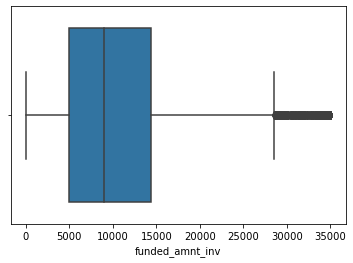

In [97]:
sns.boxplot(x='funded_amnt_inv',data=loan_df)
plt.show()

In [98]:
#No outliers in funded_amnt_inv variable


# Remove outliers if any in variable Annual income

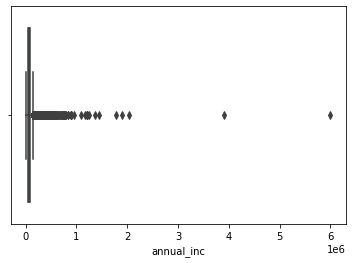

In [99]:
sns.boxplot(x='annual_inc',data=loan_df)
plt.show()

In [100]:
loan_df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [101]:
loan_df=loan_df[~(loan_df.annual_inc > 3*10**6)]

In [102]:
#after removing outliers

In [103]:
loan_df.annual_inc.describe()

count    3.971500e+04
mean     6.872312e+04
std      5.305153e+04
min      4.000000e+03
25%      4.040200e+04
50%      5.900000e+04
75%      8.229800e+04
max      2.039784e+06
Name: annual_inc, dtype: float64

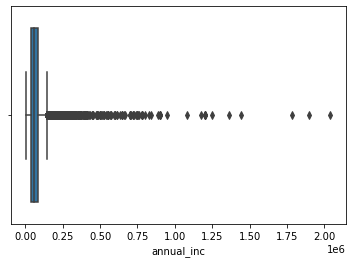

In [104]:
sns.boxplot(x='annual_inc',data=loan_df)
plt.show()


# Remove outliers if any in variable int_rate

In [105]:
loan_df.int_rate.describe()

count     39715
unique      371
top       10.99
freq        956
Name: int_rate, dtype: object

In [106]:
#no outliers

# Derive new variables
# ---------------------------------

# These new dirived variables are useful in further univariate and byvariate analysis

In [107]:
#Derive new categorical variable funded_amnt_inv_cat having loan amount funded data. But it should be distributed into defined bins

In [108]:
loan_df['funded_amnt_inv_cat']=pd.cut(loan_df['funded_amnt_inv'], [0, 10000, 15000, 20000, 30000], labels=['0-10000', '10000-15000', '15000-20000', '20000 &More'])

In [109]:
#Derive new variable int_rate_int and int_rate_cat having only integers which later can be used in uni and bivariate analysis

In [110]:
loan_df['int_rate_int']=loan_df.int_rate.apply(lambda x:x.split('.')[0])
loan_df['int_rate_int']=loan_df['int_rate_int'].astype('int')


In [111]:
loan_df['int_rate_cat']=pd.cut(loan_df['int_rate_int'], [0, 5, 10, 15, 25,30], labels=['0-5', '5-10', '10-15', '15-20','20 &More'])

In [112]:
#Derive new variable dti

In [113]:
loan_df['dti_int']=loan_df['dti'].astype('int')
#loan_df['dti_int']=loan_df.dti.apply(lambda x:x.split('.')[0])


In [114]:
#Derive new variables year and month from variable issue_d

In [115]:
loan_df['issue_d'] = loan_df.issue_d.apply(lambda x: "01-"+x)
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d)

In [116]:
loan_df['month']=loan_df.issue_d.dt.month
loan_df['year']=loan_df.issue_d.dt.year

In [117]:
#Derive new categorical variable annual_inc having annual incode data. But it should be distributed into defined bins

In [118]:
loan_df['annual_inc_cat'] = pd.cut(loan_df['annual_inc'], [0, 30000, 60000, 90000, 100000,1000000], labels=['0-30000', '30000-60000', '60000-100000', '100000-1000000', '1000000 +'])

In [119]:
#Convert float to int type for data analysis
loan_df[['annual_inc']]=loan_df[['annual_inc']].astype('int')

In [120]:
# covert variable revol_util to int type

In [121]:
loan_df['revol_util_int']=loan_df.revol_util.apply(lambda x:x.split('%')[0])
loan_df['revol_util_int']=loan_df.revol_util_int.apply(lambda x:x.split('.')[0])
loan_df['revol_util_int']=loan_df['revol_util_int'].astype('int')
loan_df.revol_util_int

0        83
1         9
2        98
3        21
4        53
         ..
39712    13
39713    26
39714    19
39715     0
39716    51
Name: revol_util_int, Length: 39715, dtype: int32

In [122]:
#For analysis lets create another categorical variable revol_util_cat

In [123]:
loan_df['revol_util_cat'] = pd.cut(loan_df['revol_util_int'], [0, 20, 30, 50, 70, 100], labels=['0-20', '20-30', '30-50', '50-70', '70 +'])

In [124]:
loan_df.revol_util_cat

0         70 +
1         0-20
2         70 +
3        20-30
4        50-70
         ...  
39712     0-20
39713    20-30
39714     0-20
39715      NaN
39716    50-70
Name: revol_util_cat, Length: 39715, dtype: category
Categories (5, object): ['0-20' < '20-30' < '30-50' < '50-70' < '70 +']

# Execute Univariate Analsys:
# ----------------------------------------

## loan_amnt, funded_amnt, funded_amnt_inv
## Analyse data in above variables. Most of the data in three variables should be same. In case different then we should analyze why it is different. Prior to that lets analyze the data in three variables

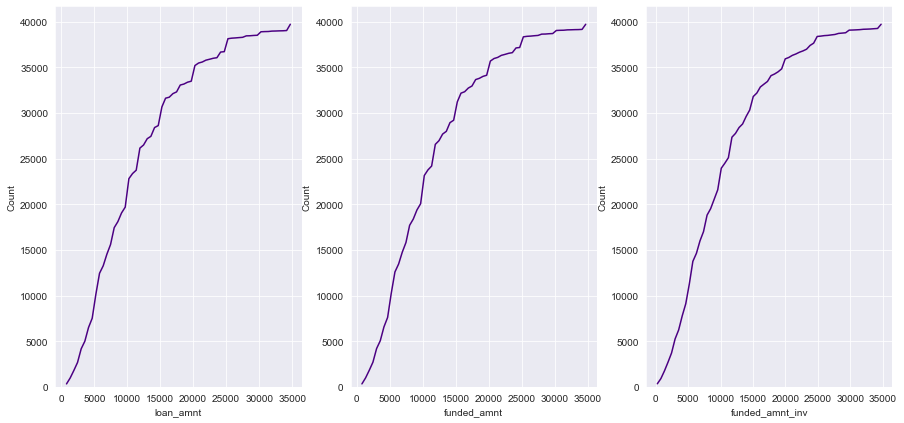

In [125]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
plt.subplot(1, 3, 1)
sns.histplot(x='loan_amnt',data=loan_df,kde=False,fill=False,element='poly',cumulative=True,color='indigo')

plt.subplot(1, 3, 2)
sns.histplot(x='funded_amnt',data=loan_df,kde=False,fill=False,element='poly',cumulative=True,color='indigo')


plt.subplot(1, 3, 3)
sns.histplot(x='funded_amnt_inv',data=loan_df,kde=False,fill=False,element='poly',cumulative=True,color='indigo')

plt.show()




In [126]:
# Above pattern shows same, so there should not be any major difference in the loan applied and amout released.
# lets consider funded_amnt_inv for further analysis

# Analyze variable revol_util

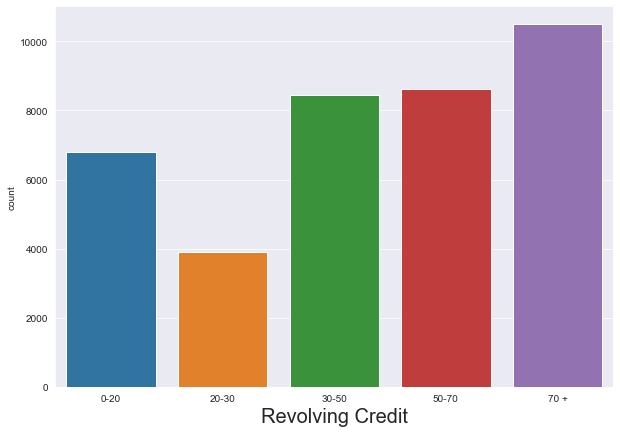

In [127]:
#https://www.investopedia.com/terms/r/revolvingcredit.asp
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.countplot(x='revol_util_cat',data=loan_df,)
plt.xlabel('Revolving Credit',fontdict={'fontsize':20})
plt.show()

In [128]:
    #as per above plot, there are more number records which as revolving credit percentage more than 30 
# (which is not good as per link:https://www.investopedia.com/terms/r/revolvingcredit.asp )

# Analyze addr_state variable

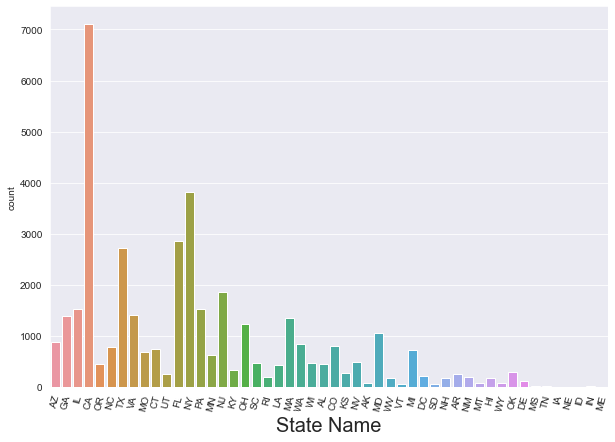

In [129]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.countplot(x='addr_state',data=loan_df,)
plt.xlabel('State Name',fontdict={'fontsize':20})
plt.xticks(rotation=75)
plt.show()

In [130]:
#As per above plot, more number of applicats are from CA and NY

# To know more on above loan status categories, i went through below link
https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-
# Analyse column loan_status variable


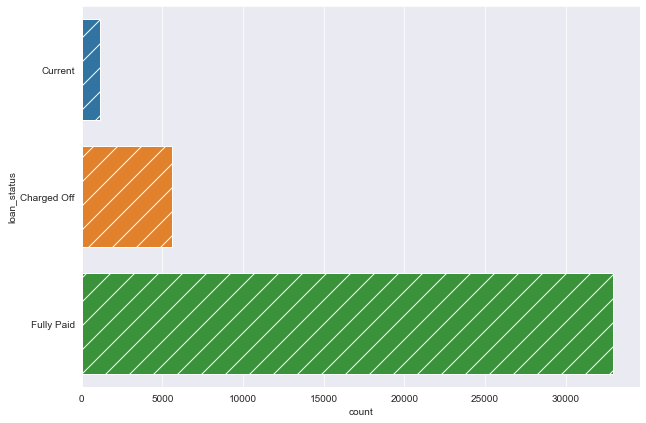

In [131]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.countplot(y='loan_status',data=loan_df, order=loan_df.loan_status.value_counts().index[::-1],hatch='/')
plt.show()

In [132]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [133]:
(loan_df.loan_status.value_counts()*100)/len(loan_df)

Fully Paid     82.961098
Charged Off    14.168450
Current         2.870452
Name: loan_status, dtype: float64

In [134]:
# Total 83% of the people fully closed the loans
# Total 14% of the people are under Charged off section
# Total 3% of the the people are in progress state

# Analyze variable purpose of the loan 

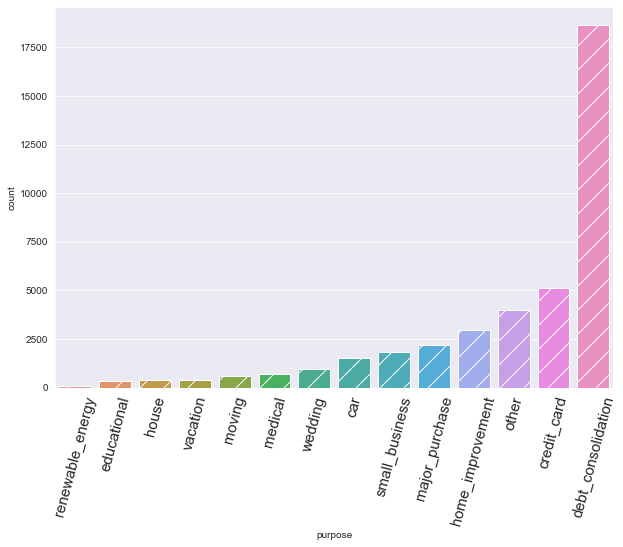

In [135]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.countplot(x='purpose',data=loan_df, order=loan_df.purpose.value_counts().index[::-1],hatch='/')
plt.xticks(rotation=75,size=15)
plt.show()

In [136]:
(loan_df.purpose.value_counts()*100)/len(loan_df)

debt_consolidation    46.936926
credit_card           12.917034
other                 10.054136
home_improvement       7.488355
major_purchase         5.506735
small_business         4.602795
car                    3.900290
wedding                2.384489
medical                1.744933
moving                 1.467959
vacation               0.959335
house                  0.959335
educational            0.818331
renewable_energy       0.259348
Name: purpose, dtype: float64

In [137]:
# As per above output, conclusion is most of the people take loans for debt_consolidation,Credit_card payments
# Other category also has 10% of the people which should be considered but reason not sure


# Analyse variable grade
# LC grades priority is A>B>C>D....

In [138]:
#loan_annincvsintrate['chargedoff_in(%)'].fillna(0,inplace=True)
#loan_annincvsintrate

In [139]:
loan_df[['grade','sub_grade','loan_status']]

,grade,sub_grade,loan_status
0,B,B2,Fully Paid
1,C,C4,Charged Off
2,C,C5,Fully Paid
3,C,C1,Fully Paid
4,B,B5,Current
...,...,...,...
39712,A,A4,Fully Paid
39713,C,C1,Fully Paid
39714,A,A4,Fully Paid
39715,A,A2,Fully Paid


In [140]:
#loan_gradevsstatus = loan_df[['grade','sub_grade','loan_status']]

In [141]:
#referred below links to learn more on groupby,unstack and reset_index
#https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9
#https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/
#https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php
#loan_gradevsstatus1=loan_gradevsstatus.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [142]:
#loan_gradevsstatus1.head()

In [143]:
#Derive one more column which shows % of people charged off based on totalnumber based on grades

In [144]:
#loan_gradevsstatus1['total_num_loanstatus']=loan_gradevsstatus1['Charged Off']+loan_gradevsstatus1.Current+loan_gradevsstatus1['Fully Paid']

In [145]:
#loan_gradevsstatus1.head()

In [146]:
#loan_gradevsstatus1['chargedoff_in(%)']=loan_gradevsstatus1['Charged Off']*100/loan_gradevsstatus1.total_num_loanstatus

In [147]:
#loan_gradevsstatus1.sort_values('chargedoff_in(%)',ascending=False).head()

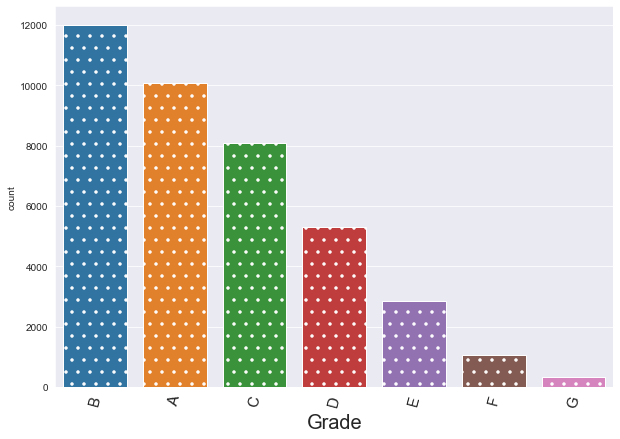

In [148]:
#plt.bar(loan_gradevsstatus1['grade'],loan_gradevsstatus1['chargedoff_in(%)'],label="Charged Off")
#plt.show()
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
#sns.barplot(x='grade', y='chargedoff_in(%)', data=loan_gradevsstatus1, order=loan_gradevsstatus1.grade.value_counts().index,hatch='.')
sns.countplot(x='grade', data=loan_df, order=loan_df.grade.value_counts().index,hatch='.')
plt.xticks(rotation=75,size=15)
plt.xlabel('Grade',fontdict={'fontsize':20})
plt.show()

In [149]:
# Based on above graph, more number of applicats are from grade A and B and grades priority is A>B>C>D....

# Lets analyze how many loans granted on year basis

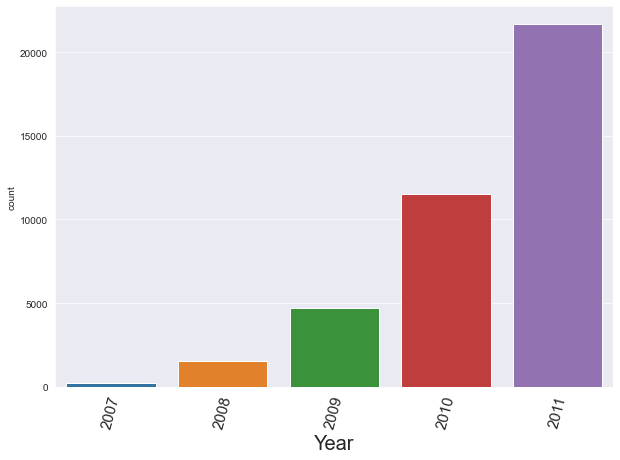

In [150]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.countplot(x='year', data=loan_df, order=loan_df.year.value_counts().index[::-1])
plt.xticks(rotation=75,size=15)
plt.xlabel('Year',fontdict={'fontsize':20})
plt.show()

In [151]:
#As per above graph, more number of loans allotted in the year 2010 and 2011. As per above number loans given increasing year by year

# Analyze the variable term (Tenure to repay the loan)

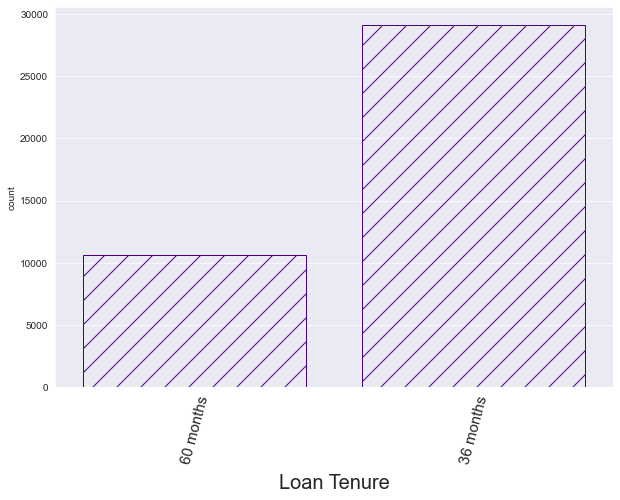

In [152]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.countplot(x='term', data=loan_df, order=loan_df.term.value_counts().index[::-1],fill=False,ec='indigo',hatch="/")
plt.xticks(rotation=75,size=15)
plt.xlabel('Loan Tenure',fontdict={'fontsize':20})
plt.show()

In [153]:
#As per above graph, most of the loans tensure is for 36 months

# Analyze variable home_ownership

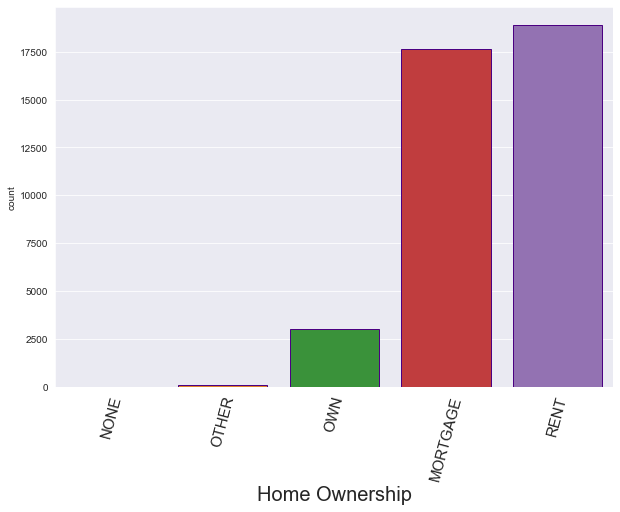

In [154]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.countplot(x='home_ownership', data=loan_df, order=loan_df.home_ownership.value_counts().index[::-1],fill=True,ec='indigo')
plt.xticks(rotation=75,size=15)
plt.xlabel('Home Ownership',fontdict={'fontsize':20})
plt.show()

In [155]:
#As per above graph, most of the loan applicants are staying in rented house or or their house is mortgage

# Analyze variable int_rate

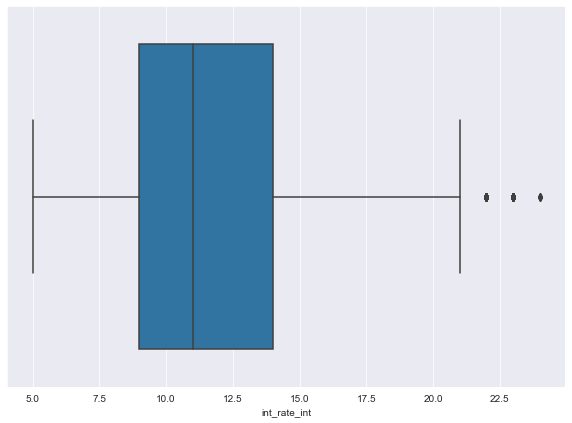

In [156]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.boxplot(x='int_rate_int', data=loan_df)
plt.show()


In [157]:
#There are not many outliers.

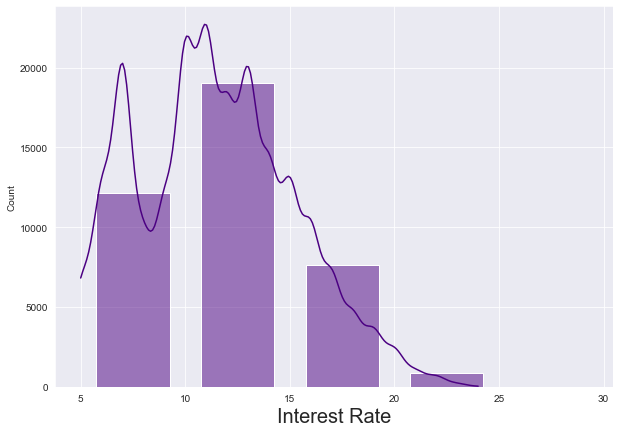

In [158]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
#sns.histplot(x='loan_amnt',data=loan_df,kde=False,fill=False,element='poly',cumulative=True,color='indigo')
sns.histplot(x='int_rate_int', kde=True,data=loan_df,binwidth=5,binrange=(5,30), shrink=0.7, color='indigo',)
plt.xlabel('Interest Rate',fontdict={'fontsize':20})
plt.show()

In [159]:
#Most of the loans were granted in the interest rate between 5 and 20

# Analyze variable annual_inc

In [160]:
loan_df.annual_inc_cat.value_counts()

30000-60000       16861
60000-100000      10477
1000000 +          5673
0-30000            4624
100000-1000000     2068
Name: annual_inc_cat, dtype: int64

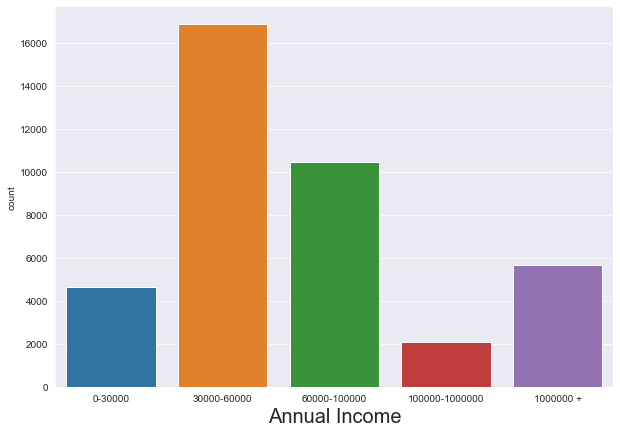

In [161]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
#sns.histplot(x='annual_inc',data=loan_df,kde=False,fill=False,element='poly',cumulative=True,color='indigo')
sns.countplot(x='annual_inc_cat',data=loan_df)
plt.xlabel('Annual Income',fontdict={'fontsize':20})
plt.show()


In [162]:
#As per above graph, most of applicats income in range 30k-60k and 60k-1lac

# Analyze variable Emp experience

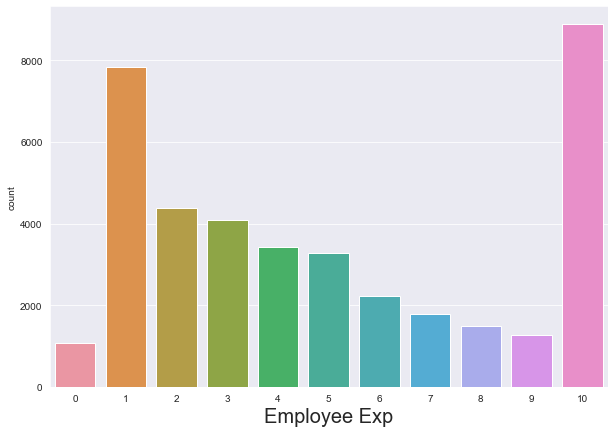

In [163]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
#sns.histplot(x='loan_amnt',data=loan_df,kde=False,fill=False,element='poly',cumulative=True,color='indigo')
sns.countplot(x='emp_length',data=loan_df)
plt.xlabel('Employee Exp',fontdict={'fontsize':20})
plt.show()

In [164]:
#As per above graph, most of the applicants are from 1year and 10year exp

# Analyze dti data

In [165]:
loan_df.dti.value_counts()

0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
28.77      1
29.40      1
25.19      1
29.21      1
25.43      1
Name: dti, Length: 2868, dtype: int64

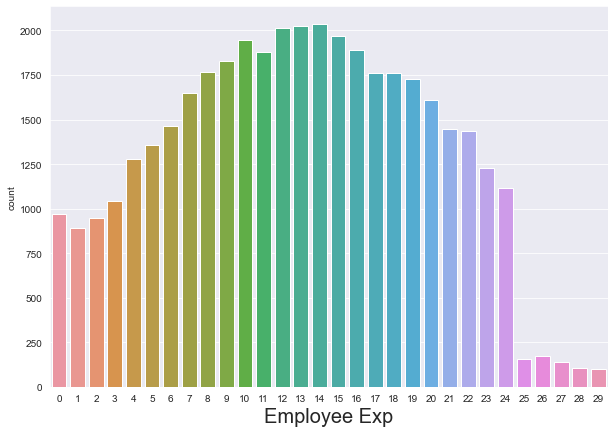

In [166]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
#sns.histplot(x='loan_amnt',data=loan_df,kde=False,fill=False,element='poly',cumulative=True,color='indigo')
sns.countplot(x='dti_int',data=loan_df)
plt.xlabel('Employee Exp',fontdict={'fontsize':20})
plt.show()

In [167]:
# As per above data, i can confirm DTI ration is good and less than 36% (ref: https://www.investopedia.com/terms/d/dti.asp)

# Bivariate Analysis: 
# -------------------------------

# I am going to pickup variables Int_rate,loan_status against with other variables shortlisted above 


# addr_state vs loan_status

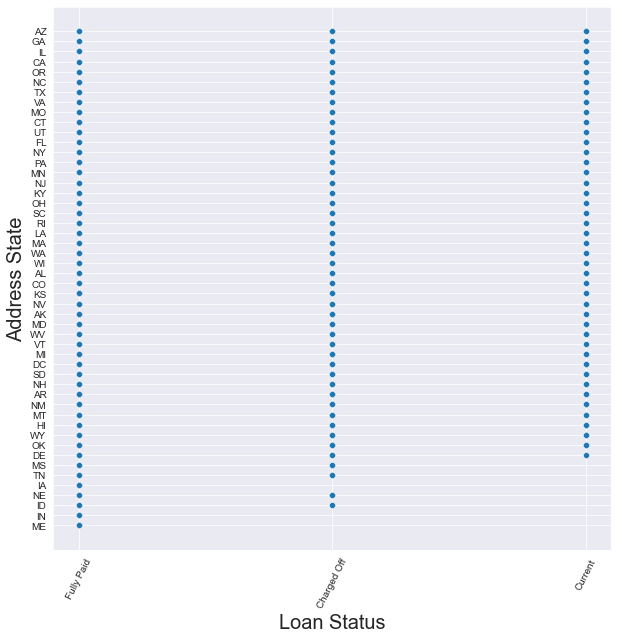

In [168]:
#Referred: https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(y='addr_state',x='loan_status', data=loan_df)
plt.xlabel('Loan Status', fontdict={'fontsize':20})
plt.ylabel('Address State', fontdict={'fontsize':20})
plt.xticks(rotation=63)
plt.yticks(rotation=0)
plt.show()



In [169]:
#No conclusion from above plot. Charged off people there from almost all places

# Revol_util vs Loan_Status

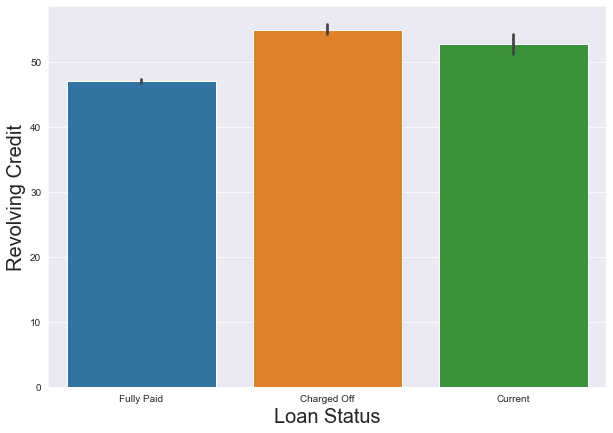

In [170]:

plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(y='revol_util_int',x='loan_status', data=loan_df)
plt.xlabel('Loan Status', fontdict={'fontsize':20})
plt.ylabel('Revolving Credit', fontdict={'fontsize':20})
plt.show()



In [171]:
#As per above plot there is not clarity, but can be useful to verify fully paid people and having revol_credit>30%

# grade vs int_rate

In [172]:
#loan_df['int_rate_int']=loan_df.int_rate.apply(lambda x:x.split('.')[0])
#loan_df['int_rate_int']=loan_df['int_rate_int'].astype('int')

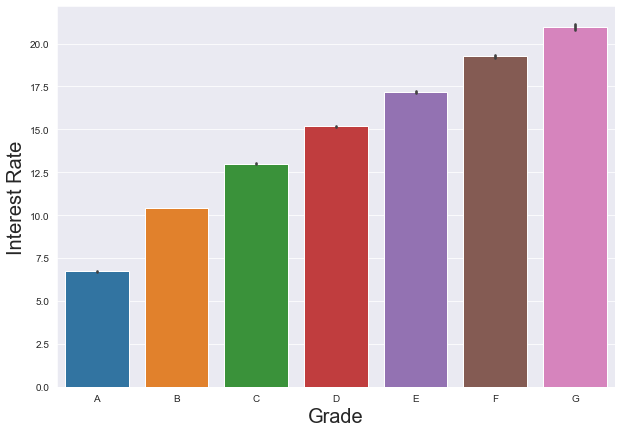

In [173]:
#Referred: https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(loan_df.grade,loan_df.int_rate_int,order='ABCDEFG')
plt.xlabel('Grade', fontdict={'fontsize':20})
plt.ylabel('Interest Rate', fontdict={'fontsize':20})
plt.show()



In [174]:
#Based on above graph, i can conclude interest rate is finalyzed based on grades. Grades priority is A>B>C...

# grade vs loan_status

In [175]:
#referred below links to learn more on groupby,unstack and reset_index
#https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9
#https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/
#https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php

In [176]:
loan_gradevsls=loan_df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [177]:
loan_gradevsls.head()

loan_status,grade,Charged Off,Current,Fully Paid
0,A,602,40,9443
1,B,1425,345,10249
2,C,1347,264,6486
3,D,1118,222,3967
4,E,715,179,1948


In [178]:
loan_gradevsls['total_lsval']=loan_gradevsls['Charged Off']+loan_gradevsls['Current']+loan_gradevsls['Fully Paid']

In [179]:
loan_gradevsls['chargedoff_in(%)']=(loan_gradevsls['Charged Off']/loan_gradevsls['total_lsval'])*100

In [180]:
loan_gradevsls.head()

loan_status,grade,Charged Off,Current,Fully Paid,total_lsval,chargedoff_in(%)
0,A,602,40,9443,10085,5.969261
1,B,1425,345,10249,12019,11.856228
2,C,1347,264,6486,8097,16.635791
3,D,1118,222,3967,5307,21.066516
4,E,715,179,1948,2842,25.158339


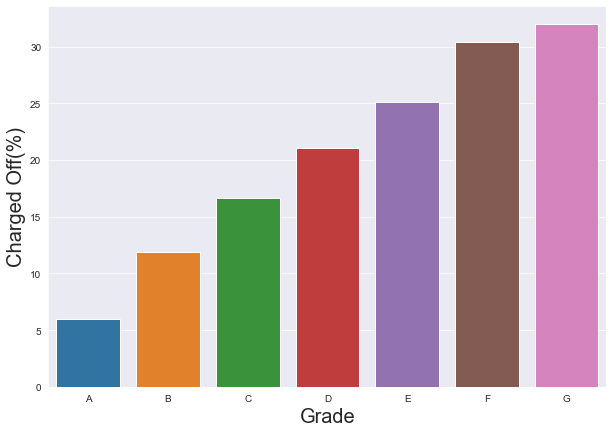

In [181]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='grade',y='chargedoff_in(%)',data=loan_gradevsls,order='ABCDEFG')
plt.xlabel('Grade', fontdict={'fontsize':20})
plt.ylabel('Charged Off(%)', fontdict={'fontsize':20})
plt.show()

In [182]:
#As per result above, there could be more chances of charged off provided grade is least

In [183]:
loan_gradevsls['fullypaid_in(%)']=(loan_gradevsls['Fully Paid']/loan_gradevsls['total_lsval'])*100

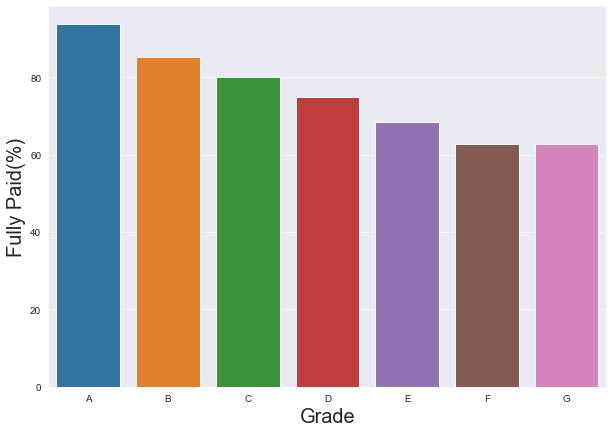

In [184]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='grade',y='fullypaid_in(%)',data=loan_gradevsls,order='ABCDEFG')
plt.xlabel('Grade', fontdict={'fontsize':20})
plt.ylabel('Fully Paid(%)', fontdict={'fontsize':20})
plt.show()

In [185]:
#Consider people who are lower grades may be high chances for charged off

# Loan amount funded vs loan status

In [186]:
loan_lamtvsls=loan_df.groupby(['funded_amnt_inv_cat','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [187]:
loan_lamtvsls.head()

loan_status,funded_amnt_inv_cat,Charged Off,Current,Fully Paid
0,0-10000,3179,261,20149
1,10000-15000,1049,313,6567
2,15000-20000,713,255,3271
3,20000 &More,524,241,2420


In [188]:
loan_lamtvsls['total_lamtvsls']=loan_lamtvsls['Charged Off']+loan_lamtvsls.Current+loan_lamtvsls['Fully Paid']

In [189]:
loan_lamtvsls['chargedoff_in(%)']=(loan_lamtvsls['Charged Off']/loan_lamtvsls.total_lamtvsls)*100

In [190]:
loan_lamtvsls.sort_values('chargedoff_in(%)',ascending=False)

loan_status,funded_amnt_inv_cat,Charged Off,Current,Fully Paid,total_lamtvsls,chargedoff_in(%)
2,15000-20000,713,255,3271,4239,16.820005
3,20000 &More,524,241,2420,3185,16.452119
0,0-10000,3179,261,20149,23589,13.476620
1,10000-15000,1049,313,6567,7929,13.229916


In [191]:
#As per above data, there is no clarity on which loan amount funded category will more charged off 

# Loan amount funded vs interest rate

In [192]:
#loan_df['funded_amnt_inv_cat']=pd.cut(loan_df['funded_amnt_inv'], [0, 10000, 15000, 20000, 30000], labels=['0-10000', '10000-15000', '15000-20000', '20000 &More'])

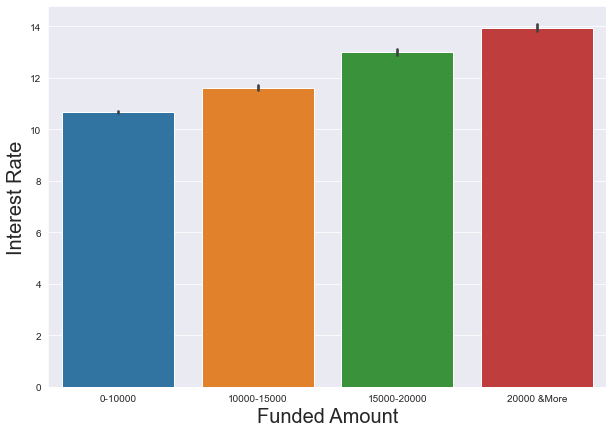

In [193]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(loan_df.funded_amnt_inv_cat,loan_df.int_rate_int)
plt.xlabel('Funded Amount', fontdict={'fontsize':20})
plt.ylabel('Interest Rate', fontdict={'fontsize':20})
plt.show()

In [194]:
#Based on above graph, we can confirm that interest rate increased when loan amount is more

# Verification status vs loan status

In [195]:
loan_df[['verification_status','loan_status']].head(5)

,verification_status,loan_status
0,Verified,Fully Paid
1,Source Verified,Charged Off
2,Not Verified,Fully Paid
3,Source Verified,Fully Paid
4,Source Verified,Current


In [196]:
loan_vervslstatus=loan_df[['verification_status','loan_status']]

In [197]:
loan_vervslstatus1=loan_vervslstatus.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [198]:
loan_vervslstatus1

loan_status,verification_status,Charged Off,Current,Fully Paid
0,Not Verified,2142,227,14551
1,Source Verified,1434,310,8242
2,Verified,2051,603,10155


In [199]:
loan_vervslstatus1['total_num_verstatus']=loan_vervslstatus1['Charged Off']+loan_vervslstatus1.Current+loan_vervslstatus1['Fully Paid']

In [200]:
loan_vervslstatus1.head()

loan_status,verification_status,Charged Off,Current,Fully Paid,total_num_verstatus
0,Not Verified,2142,227,14551,16920
1,Source Verified,1434,310,8242,9986
2,Verified,2051,603,10155,12809


In [201]:
loan_vervslstatus1['chargedoff_in(%)']=loan_vervslstatus1['Charged Off']*100/loan_vervslstatus1.total_num_verstatus

In [202]:
np.round(loan_vervslstatus1.head())

loan_status,verification_status,Charged Off,Current,Fully Paid,total_num_verstatus,chargedoff_in(%)
0,Not Verified,2142,227,14551,16920,13.0
1,Source Verified,1434,310,8242,9986,14.0
2,Verified,2051,603,10155,12809,16.0


In [203]:
# Based on above data, both not verified and verified records also almost equal number of Charged off records. 
# So based on this we cannot conclude why there are more charged off records

# Purpose vs loan status

In [204]:
loan_statusvschargedoff = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [205]:
loan_statusvschargedoff.head()

loan_status,purpose,Charged Off,Current,Fully Paid
0,car,160.0,50.0,1339.0
1,credit_card,542.0,103.0,4485.0
2,debt_consolidation,2767.0,586.0,15288.0
3,educational,56.0,0.0,269.0
4,home_improvement,347.0,101.0,2526.0


In [206]:
#Check Charged Off people in percentage
loan_statusvschargedoff['total_num_loanstatus']=loan_statusvschargedoff['Charged Off']+loan_statusvschargedoff['Current']+loan_statusvschargedoff['Fully Paid']

In [207]:
loan_statusvschargedoff.head()

loan_status,purpose,Charged Off,Current,Fully Paid,total_num_loanstatus
0,car,160.0,50.0,1339.0,1549.0
1,credit_card,542.0,103.0,4485.0,5130.0
2,debt_consolidation,2767.0,586.0,15288.0,18641.0
3,educational,56.0,0.0,269.0,325.0
4,home_improvement,347.0,101.0,2526.0,2974.0


In [208]:
loan_statusvschargedoff['chargedoff_in(%)']=loan_statusvschargedoff['Charged Off']*100/loan_statusvschargedoff.total_num_loanstatus

In [209]:
np.round(loan_statusvschargedoff.sort_values('chargedoff_in(%)',ascending=False))

loan_status,purpose,Charged Off,Current,Fully Paid,total_num_loanstatus,chargedoff_in(%)
11,small_business,475.0,74.0,1279.0,1828.0,26.0
10,renewable_energy,19.0,1.0,83.0,103.0,18.0
3,educational,56.0,0.0,269.0,325.0,17.0
9,other,633.0,128.0,3232.0,3993.0,16.0
8,moving,92.0,7.0,484.0,583.0,16.0
5,house,59.0,14.0,308.0,381.0,15.0
7,medical,106.0,12.0,575.0,693.0,15.0
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,15.0
12,vacation,53.0,6.0,322.0,381.0,14.0
4,home_improvement,347.0,101.0,2526.0,2974.0,12.0


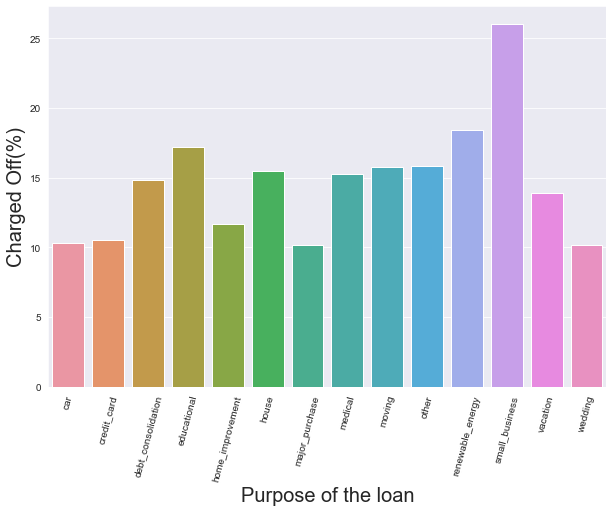

In [210]:

plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='purpose',y='chargedoff_in(%)',data=loan_statusvschargedoff)
plt.xlabel('Purpose of the loan', fontdict={'fontsize':20})
plt.ylabel('Charged Off(%)', fontdict={'fontsize':20})
plt.xticks(rotation=75)
plt.show()

In [211]:
# Based on above data, important information what we can understand is people who have taken loans for small business are not paying loans

# Loan Status vs tenure

In [212]:
loan_tenure=loan_df[['term','loan_status']].head(5)

In [213]:
loan_df.term = loan_df.term.apply(lambda x:x.split()[0])

In [214]:
loan_df.head()

,int_rate,title,loan_status,funded_amnt_inv,funded_amnt,verification_status,home_ownership,issue_d,dti,purpose,...,revol_util,funded_amnt_inv_cat,int_rate_int,int_rate_cat,dti_int,month,year,annual_inc_cat,revol_util_int,revol_util_cat
0,10.65,Computer,Fully Paid,4975.0,5000,Verified,RENT,2011-12-01,27.65,credit_card,...,83.70%,0-10000,10,5-10,27,12,2011,0-30000,83,70 +
1,15.27,bike,Charged Off,2500.0,2500,Source Verified,RENT,2011-12-01,1.00,car,...,9.40%,0-10000,15,10-15,1,12,2011,0-30000,9,0-20
2,15.96,real estate business,Fully Paid,2400.0,2400,Not Verified,RENT,2011-12-01,8.72,small_business,...,98.50%,0-10000,15,10-15,8,12,2011,0-30000,98,70 +
3,13.49,personel,Fully Paid,10000.0,10000,Source Verified,RENT,2011-12-01,20.00,other,...,21%,0-10000,13,10-15,20,12,2011,30000-60000,21,20-30
4,12.69,Personal,Current,3000.0,3000,Source Verified,RENT,2011-12-01,17.94,other,...,53.90%,0-10000,12,10-15,17,12,2011,60000-100000,53,50-70


In [215]:
loan_tenure = loan_df.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [216]:
loan_tenure.head(10)

loan_status,term,Charged Off,Current,Fully Paid
0,36,3227.0,0.0,25868.0
1,60,2400.0,1140.0,7080.0


In [217]:
loan_tenure['total_numer']=loan_tenure['Charged Off']+loan_tenure.Current+loan_tenure['Fully Paid']

In [218]:
loan_tenure['chargedoff_in(%)']=loan_tenure['Charged Off']*100/loan_tenure.total_numer

In [219]:
loan_tenure.head(10)

loan_status,term,Charged Off,Current,Fully Paid,total_numer,chargedoff_in(%)
0,36,3227.0,0.0,25868.0,29095.0,11.091253
1,60,2400.0,1140.0,7080.0,10620.0,22.598870


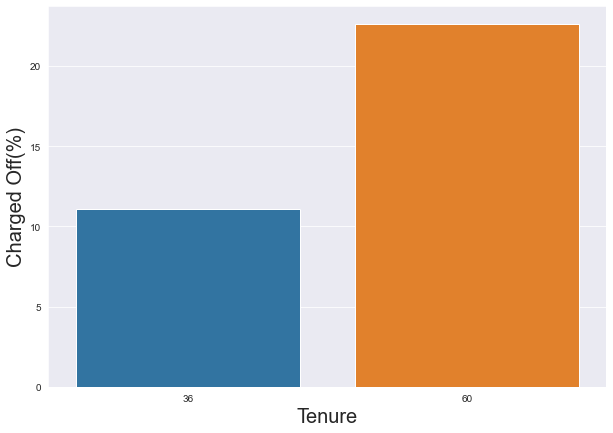

In [220]:

plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='term',y='chargedoff_in(%)',data=loan_tenure)
plt.xlabel('Tenure', fontdict={'fontsize':20})
plt.ylabel('Charged Off(%)', fontdict={'fontsize':20})
#plt.xticks(rotation=75)
plt.show()

In [221]:
# based on above data, charged off people took loan for 60months tenure, more chances of charge off


# Annual income vs loan status

In [222]:
loan_df.annual_inc_cat.value_counts()

30000-60000       16861
60000-100000      10477
1000000 +          5673
0-30000            4624
100000-1000000     2068
Name: annual_inc_cat, dtype: int64

In [223]:
loan_annincvsloan = loan_df.groupby(['annual_inc_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [224]:
loan_annincvsloan.head()

loan_status,annual_inc_cat,Charged Off,Current,Fully Paid
0,0-30000,839,73,3712
1,30000-60000,2641,451,13769
2,60000-100000,1329,346,8802
3,100000-1000000,226,64,1778
4,1000000 +,591,206,4876


In [225]:
loan_annincvsloan['total_ann_inc']=loan_annincvsloan['Charged Off']+loan_annincvsloan.Current+loan_annincvsloan['Fully Paid']

In [226]:
loan_annincvsloan.head()

loan_status,annual_inc_cat,Charged Off,Current,Fully Paid,total_ann_inc
0,0-30000,839,73,3712,4624
1,30000-60000,2641,451,13769,16861
2,60000-100000,1329,346,8802,10477
3,100000-1000000,226,64,1778,2068
4,1000000 +,591,206,4876,5673


In [227]:
loan_annincvsloan['chargedoff_in(%)']=loan_annincvsloan['Charged Off']*100/loan_annincvsloan.total_ann_inc

In [228]:
loan_annincvsloan.head()

loan_status,annual_inc_cat,Charged Off,Current,Fully Paid,total_ann_inc,chargedoff_in(%)
0,0-30000,839,73,3712,4624,18.144464
1,30000-60000,2641,451,13769,16861,15.663365
2,60000-100000,1329,346,8802,10477,12.684929
3,100000-1000000,226,64,1778,2068,10.928433
4,1000000 +,591,206,4876,5673,10.417768


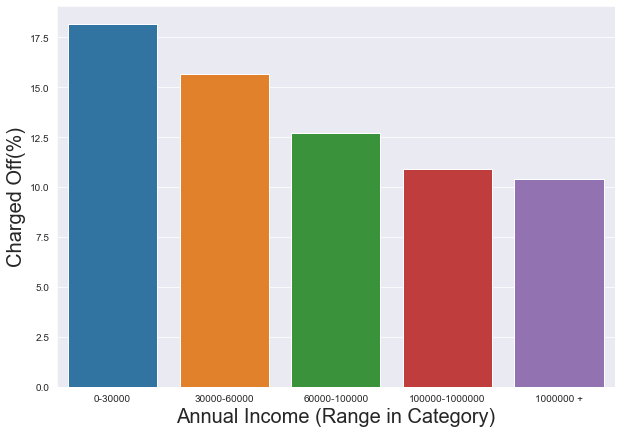

In [229]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='annual_inc_cat',y='chargedoff_in(%)',data=loan_annincvsloan)
plt.xlabel('Annual Income (Range in Category)', fontdict={'fontsize':20})
plt.ylabel('Charged Off(%)', fontdict={'fontsize':20})
#plt.xticks(rotation=75)
plt.show()

In [230]:
#AS per above data, less is the anuual income, more chances of charged off


# Year vs int_rate

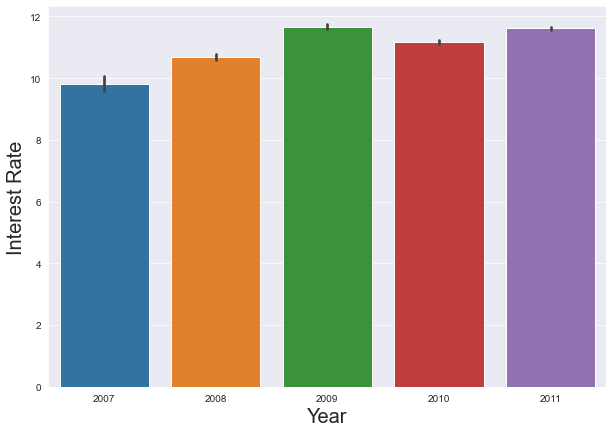

In [231]:
#loan_annincvsintrate.plot(kind='bar',y='chargedoff_in(%)',figsize=(15,15))
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='year',y='int_rate_int',data=loan_df)
plt.xlabel('Year', fontdict={'fontsize':20})
plt.ylabel('Interest Rate', fontdict={'fontsize':20})
#plt.xticks(rotation=75)
plt.show()

In [232]:
#As per above data its difficult to conlude which year has more interest rate


# Employee exp vs loan status

In [233]:
loan_df_emplvsls = loan_df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()


In [234]:
loan_df_emplvsls['total']=loan_df_emplvsls['Charged Off']+loan_df_emplvsls.Current+loan_df_emplvsls['Fully Paid']

In [235]:
loan_df_emplvsls['chargedoff_in(%)']=loan_df_emplvsls['Charged Off']*100/loan_df_emplvsls.total

In [236]:
loan_df_emplvsls.sort_values('chargedoff_in(%)',ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,total,chargedoff_in(%)
0,0,228,42,805,1075,21.209302
10,10,1331,391,7156,8878,14.992115
7,7,263,62,1448,1773,14.833615
1,1,1095,146,6582,7823,13.997188
5,5,458,88,2736,3282,13.954906
6,6,307,61,1861,2229,13.772992
8,8,203,44,1232,1479,13.725490
3,3,555,83,3456,4094,13.556424
4,4,462,94,2880,3436,13.445867
2,2,567,97,3724,4388,12.921604


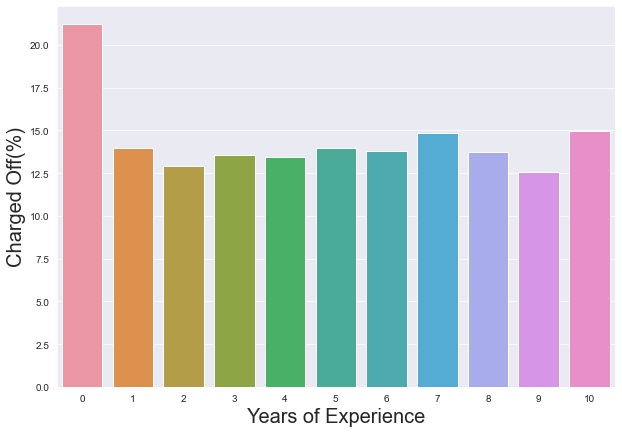

In [237]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='emp_length', y='chargedoff_in(%)', data=loan_df_emplvsls)
plt.xlabel('Years of Experience', fontdict={'fontsize':20})
plt.ylabel('Charged Off(%)', fontdict={'fontsize':20})
plt.show()



In [238]:
#As per above analysis, employees having less than one year experience have more chances of "Charge Off"

# pub_rec_bankruptcies vs loan status

In [239]:
loan_df_bankrupvsls = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [240]:
loan_df_bankrupvsls

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid
0,0.0,5141.0,1101.0,31095.0
1,1.0,366.0,37.0,1271.0
2,2.0,2.0,2.0,3.0
3,unknown,118.0,0.0,579.0


In [241]:
loan_df_bankrupvsls['total']=loan_df_bankrupvsls['Charged Off']+loan_df_bankrupvsls['Fully Paid']+loan_df_bankrupvsls.Current

In [242]:
loan_df_bankrupvsls['chargedoff_in(%)']=loan_df_bankrupvsls['Charged Off']*100/loan_df_bankrupvsls.total

In [243]:
loan_df_bankrupvsls.sort_values('chargedoff_in(%)',ascending=True)

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,total,chargedoff_in(%)
0,0.0,5141.0,1101.0,31095.0,37337.0,13.769183
3,unknown,118.0,0.0,579.0,697.0,16.929699
1,1.0,366.0,37.0,1271.0,1674.0,21.863799
2,2.0,2.0,2.0,3.0,7.0,28.571429


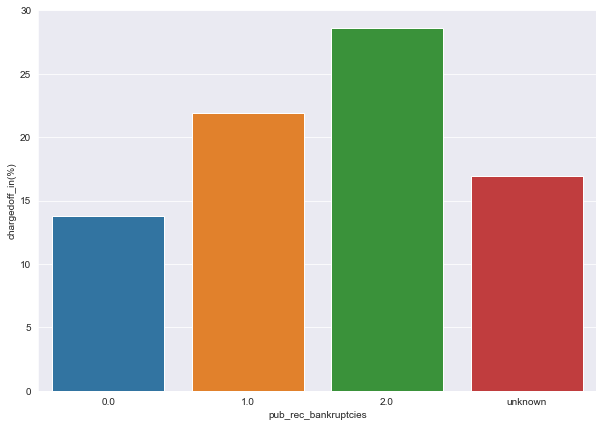

In [244]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x='pub_rec_bankruptcies', y='chargedoff_in(%)', data=loan_df_bankrupvsls)
plt.show()



In [245]:
#based on above data, we can have clear piciture that people having court cases have chances of Charged Off

# pub_rec vs Loan status
# To understand more on pub_rec, i have gone through link: https://budgeting.thenest.com/derogatory-public-record-mean-25266.html

In [246]:
loan_df_pubrvsls = loan_df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

In [247]:
loan_df_pubrvsls['total']=loan_df_pubrvsls['Charged Off']+loan_df_pubrvsls.Current+loan_df_pubrvsls['Fully Paid']

In [248]:
loan_df_pubrvsls['chargedoff_in(%)']=(loan_df_pubrvsls['Charged Off']/loan_df_pubrvsls.total)*100

In [249]:
loan_df_pubrvsls.sort_values('chargedoff_in(%)',ascending=False)

loan_status,pub_rec,Charged Off,Current,Fully Paid,total,chargedoff_in(%)
1,1,457.0,43.0,1556.0,2056.0,22.227626
2,2,10.0,3.0,38.0,51.0,19.607843
0,0,5160.0,1094.0,31345.0,37599.0,13.723769
3,3,0.0,0.0,7.0,7.0,0.000000
4,4,0.0,0.0,2.0,2.0,0.000000


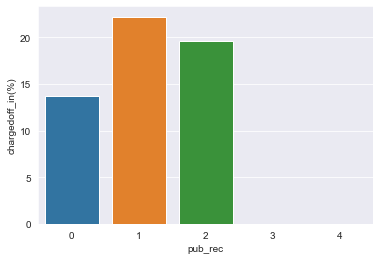

In [250]:
sns.barplot(x='pub_rec', y='chargedoff_in(%)', data=loan_df_pubrvsls)
plt.show()



In [251]:
#Based on above data pub_rec having 1 and 2 records have more chances of charged off. 

In [252]:
# lets compare pub_rec data with Fully Paid(%)

In [253]:
loan_df_pubrvsls['fullypaid_in(%)']=(loan_df_pubrvsls['Fully Paid']/loan_df_pubrvsls.total)*100

In [254]:
loan_df_pubrvsls.head(1)

loan_status,pub_rec,Charged Off,Current,Fully Paid,total,chargedoff_in(%),fullypaid_in(%)
0,0,5160.0,1094.0,31345.0,37599.0,13.723769,83.366579


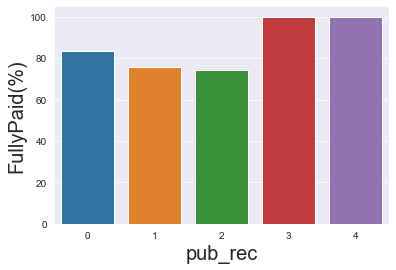

In [255]:
sns.barplot(x='pub_rec', y='fullypaid_in(%)', data=loan_df_pubrvsls)
plt.xlabel('pub_rec', fontdict={'fontsize':20})
plt.ylabel('FullyPaid(%)', fontdict={'fontsize':20})
plt.show()



In [256]:
#High risk to provide new loans to people who are pub_rec 3 and 4

# Multivariate Analysis
# -----------------------------------

# annual_inc vs int_rate vs loan status

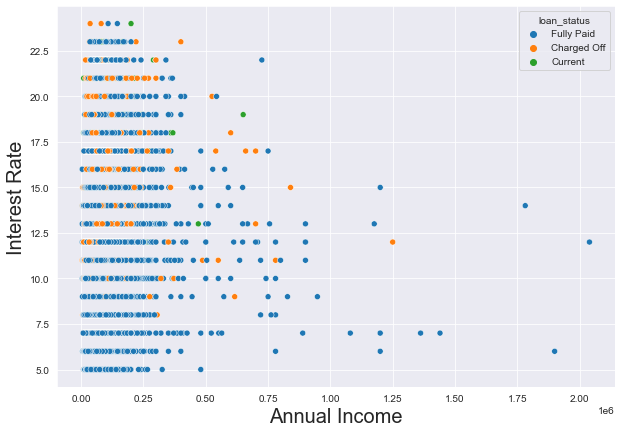

In [257]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.scatterplot(y='int_rate_int',x="annual_inc", hue='loan_status', data=loan_df)
plt.xlabel('Annual Income', fontdict={'fontsize':20})
plt.ylabel('Interest Rate', fontdict={'fontsize':20})

plt.show()


In [258]:
# Based on above plot, we can confirm customres can be charged off when interest is greater than 10 and income is less than 30

# Purpose of loan vs int_rate vs loan status

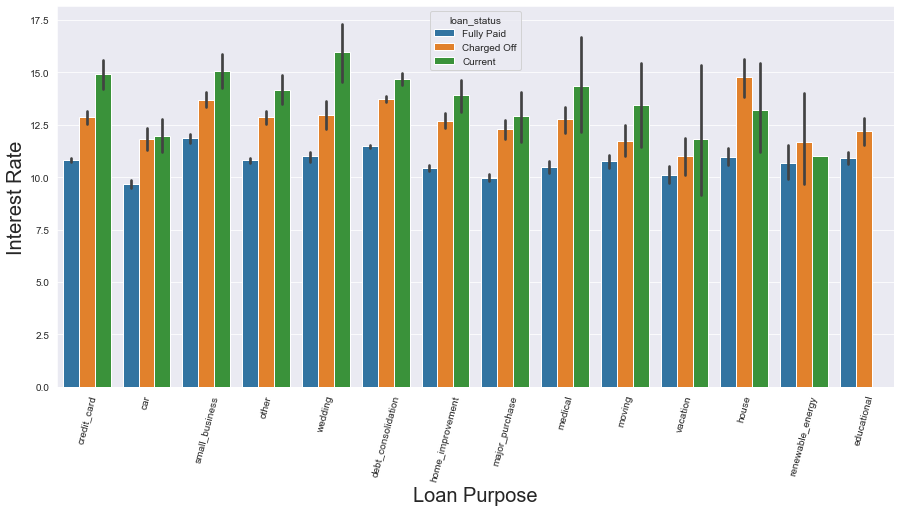

In [259]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.barplot(y='int_rate_int',x="purpose", hue='loan_status', data=loan_df)
plt.xlabel('Loan Purpose', fontdict={'fontsize':20})
plt.ylabel('Interest Rate', fontdict={'fontsize':20})
plt.xticks(rotation=75)
plt.show()


In [260]:
# Based on above plot, we can confirm customers taking loan for Small_business,house and others has more changes of charged off

# emp_length vs int_rate vs loan status

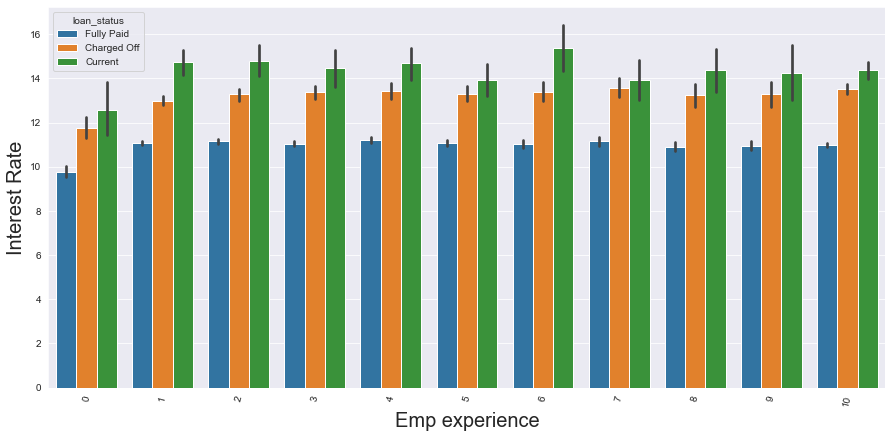

In [261]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.barplot(y='int_rate_int',x="emp_length", hue='loan_status', data=loan_df)
plt.xlabel('Emp experience', fontdict={'fontsize':20})
plt.ylabel('Interest Rate', fontdict={'fontsize':20})
plt.xticks(rotation=75)
plt.show()


In [262]:
#No conclusion on charged off records from above plot. 

# emp_length vs term vs loan status

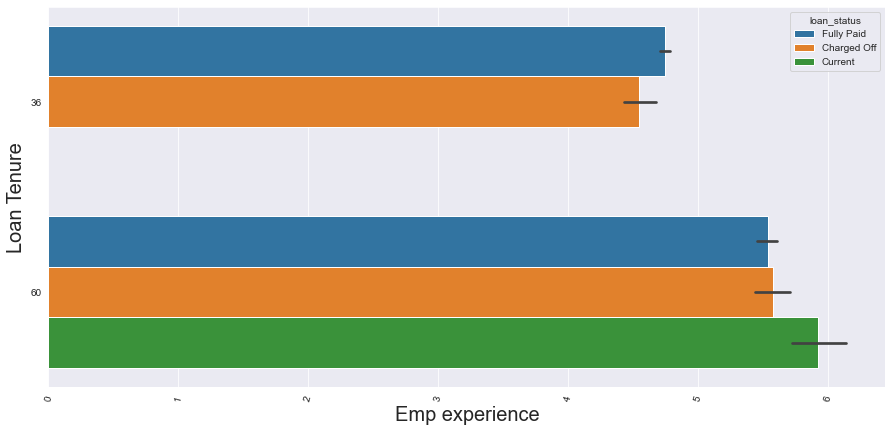

In [263]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.barplot(y='term',x="emp_length", hue='loan_status', data=loan_df)
plt.xlabel('Emp experience', fontdict={'fontsize':20})
plt.ylabel('Loan Tenure', fontdict={'fontsize':20})
plt.xticks(rotation=75)
plt.show()


In [264]:
#No conclusion on charged off records from above plot. 

# grade vs term vs funded_amnt_inv vs loan status

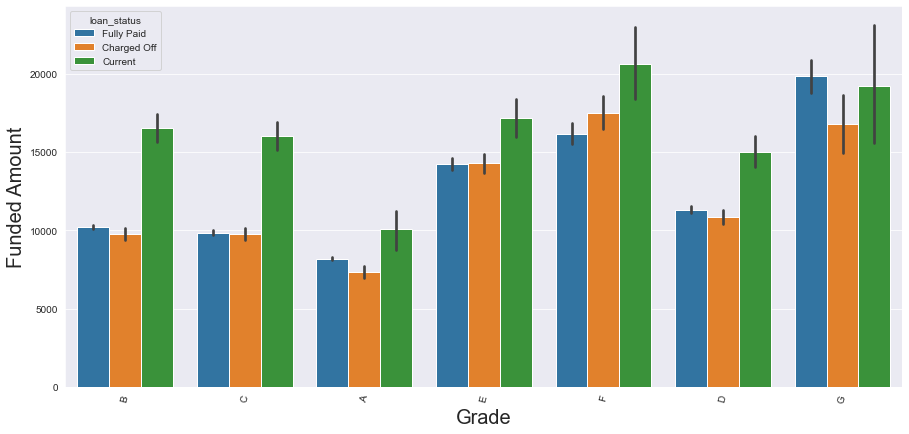

In [265]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.barplot(y='funded_amnt_inv',x="grade", hue='loan_status', data=loan_df)
plt.xlabel('Grade', fontdict={'fontsize':20})
plt.ylabel('Funded Amount', fontdict={'fontsize':20})
plt.xticks(rotation=75)
plt.show()


In [266]:
#As per above plot, there will be more chances of "charged off" when having less grades

# home_ownership vs annual_inc vs loan status

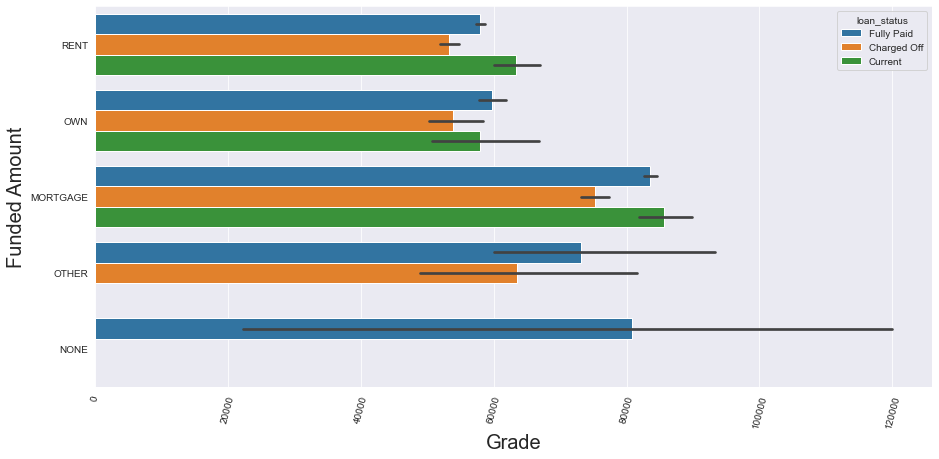

In [267]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.barplot(y='home_ownership',x="annual_inc", hue='loan_status', data=loan_df)
plt.xlabel('Grade', fontdict={'fontsize':20})
plt.ylabel('Funded Amount', fontdict={'fontsize':20})
plt.xticks(rotation=75)
plt.show()


In [268]:
#high chances that houses in Mortgage or other categories may have high chances of Charged off

# Grade vs Annual_income vs loan_status

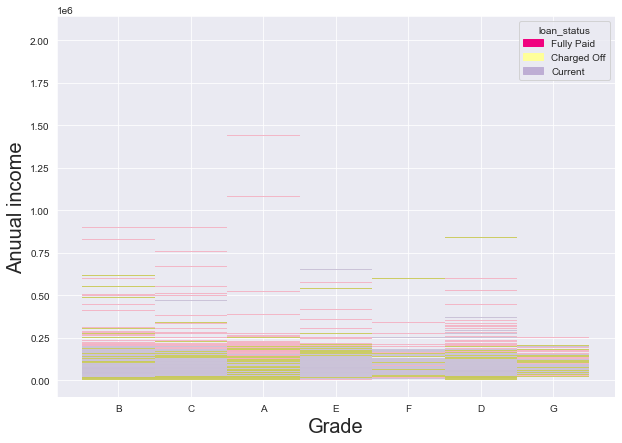

In [269]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.histplot(x='grade',y='annual_inc',hue='loan_status',data=loan_df,palette='Accent_r')
plt.xlabel('Grade', fontdict={'fontsize':20})
plt.ylabel('Anuual income', fontdict={'fontsize':20})
plt.show()

In [270]:
#Based on above plot there could be chances of charged off even from fully paid if their salary is low and comes under low grades

# Revolving credit vs Annual_income vs loan_status

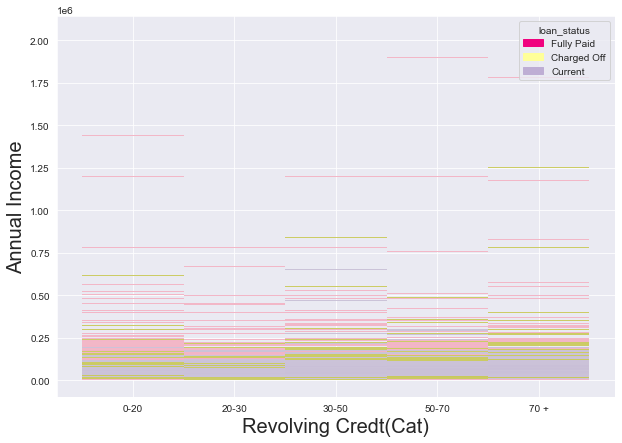

In [271]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.histplot(x='revol_util_cat',y='annual_inc',hue='loan_status',data=loan_df,palette='Accent_r')
plt.xlabel('Revolving Credt(Cat)', fontdict={'fontsize':20})
plt.ylabel('Annual Income', fontdict={'fontsize':20})
plt.show()

In [272]:
#There are some extent of records, with less income 30k and are having revol_credit score more than 30% 

# Based on above analysis below is the plot shows int_ratevs[fundedAmount,AnnualIncome]

In [273]:
loan_df_pg = loan_df[['funded_amnt_inv','annual_inc','int_rate_int','loan_status','grade']]

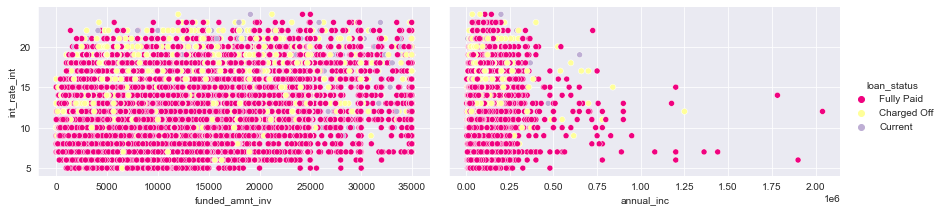

In [274]:
#ref: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
pg = sns.PairGrid(loan_df_pg,hue='loan_status',diag_sharey=False,height=3,aspect=2, palette='Accent_r',
                  x_vars=['funded_amnt_inv','annual_inc'],y_vars=['int_rate_int'])
pg.map_diag(sns.kdeplot)
pg.map_offdiag(sns.scatterplot)
pg.add_legend();
plt.show()

In [275]:
#From above plot its clear that majority of the charged off is because of high interest rates

In [276]:
#plt.figure(figsize=(15,7))
#sns.set_style('darkgrid')
#sns.pairplot(loan_df[['funded_amnt_inv','annual_inc','int_rate_int','loan_status','grade']], hue = 'loan_status',size = 5)
#plt.show()

In [277]:
from ipywidgets import interactive
def widgsize(height=2.5,aspect=1):
    sns.pairplot(loan_df[['funded_amnt_inv','annual_inc','int_rate_int','loan_status','grade']],hue="loan_status",height=height,aspect=aspect)

In [278]:
interactive(widgsize,hieght=(1,3.5,0.5),aspect=(0.5,2,0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=7.5, min=-2.5), FloatSlider(value=1.0, …

# Final observations:

In [279]:
#Main data to consider is loan_status having 'Charged Off' and 'Fully Paid'
#Based on above analysis below are my observations on the applications who are seeking for new loans

In [280]:
# "Charged Off" category:

In [281]:
#plot: int_rate vs[fundedAmount,AnnualIncome], grade vs int_rate, Loan amount funded vs interest rate
#loan vs int_rate vs loan status, pub_rec_bankruptcies vs loan status, pub_rec vs Loan status
#Revolving credit vs Annual_income vs loan_status, # Grade vs Annual_income vs loan_status

#Based on this plots below are my observation1
#1. Higher is the interst rate, more chances of applicants falling in "charged off" category
#2. Higher is the interest rate when having low grades may fall in "charged off" categroy
#3. Seeking loans for small business, other, house categories may fall in "charged Of" category
#4. Up to some extent, with less income <30k and are having revol_credit score more than 30% may fall in "Charged Off" category
#5. pub_rec having 1 and 2 and having court cases have high chances to fall in "Cahrged Off" category
#6. Less is the income and having high interest rate have high chances to fall in "Charged Off" category
#7. High chances of “Charged off” ration when having more bankrupt cases


In [282]:
# "Fully Paid" category:

In [283]:
#1. High risk to provide loans when having pub_rec as 1 and 2 and having court cases
#2. High risk when revol_credit score greater than 30% and getting less income
#3. High risk when interest rate is high for low-income people
#4. Low risk when getting less income and having least grades

In [284]:
#-------------------------------xxxxxxxxxxxxxxxxxxxxx---------------------------------------------------

#                                              End